In [3]:
#Step 1: Install Required Library

import yfinance as yf
import pandas as pd

#Step 2: Python Code to Collect Data
# Download historical stock data for TCS
tcs = yf.download('TCS.NS', start='2015-01-01', end='2024-12-31')

# Save to CSV
tcs.to_csv('TCS_Stock_Data.csv')

# Display first 5 rows
print(tcs.head())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open   Volume
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS   TCS.NS
Date                                                                   
2015-01-01  1049.376831  1058.219353  1047.501120  1058.219353   366830
2015-01-02  1063.351562  1068.092319  1051.458509  1051.623364   925740
2015-01-05  1047.191895  1071.781952  1040.760915  1063.990662  1754242
2015-01-06  1008.585876  1042.595658  1005.865054  1042.595658  2423784
2015-01-07   996.671936  1022.004046   992.446479  1018.232093  2636332


In [9]:

#Phase 2: Data Preprocessing and Visualization
 #Step 1: Load and Explore the Data
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('TCS_Stock_Data.csv', index_col=0, parse_dates=True)
print(df.head())

# Display basic info
print(df.info())
print(df.head())




                         Close                High                 Low  \
Price                                                                    
Ticker                  TCS.NS              TCS.NS              TCS.NS   
Date                       NaN                 NaN                 NaN   
2015-01-01  1049.3768310546875   1058.219352849685  1047.5011202146668   
2015-01-02        1063.3515625   1068.092318552737    1051.45850878915   
2015-01-05    1047.19189453125  1071.7819522987752  1040.7609149743084   

                          Open   Volume  
Price                                    
Ticker                  TCS.NS   TCS.NS  
Date                       NaN      NaN  
2015-01-01   1058.219352849685   366830  
2015-01-02   1051.623364394075   925740  
2015-01-05  1063.9906622518083  1754242  
<class 'pandas.core.frame.DataFrame'>
Index: 2468 entries, Ticker to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0 

C:\Users\Asus\AppData\Local\Temp\ipykernel_12408\2616058505.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('TCS_Stock_Data.csv', index_col=0, parse_dates=True)


In [10]:
#step 2 data cleaning
print(df.isnull().sum())
df.dropna(inplace=True)

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


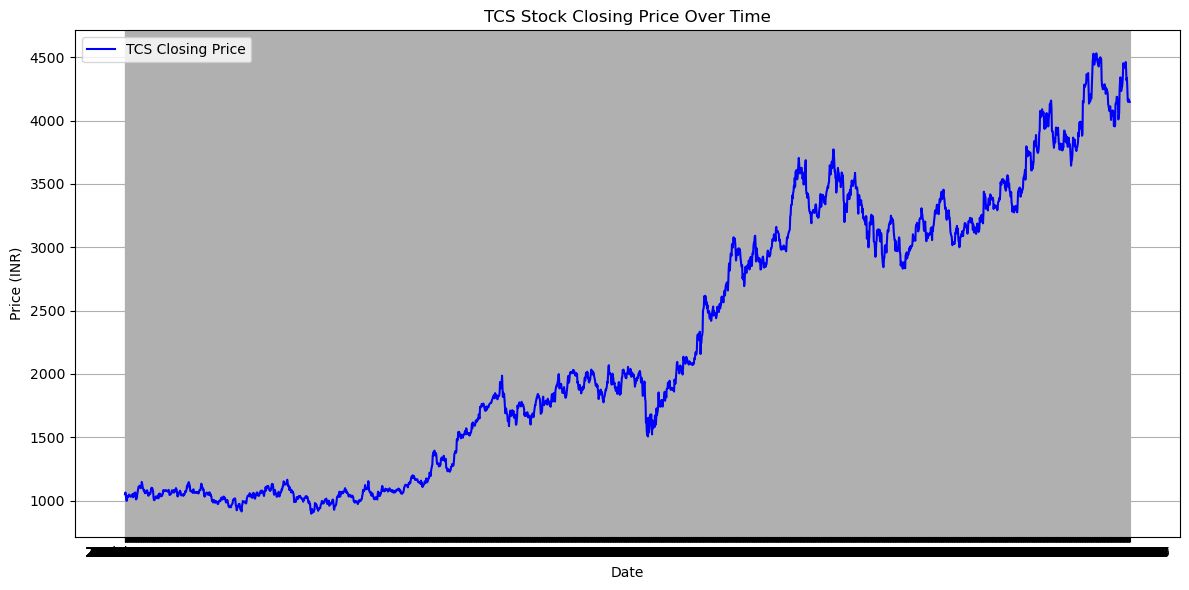

In [18]:
#Step 3: Visualization – Line Chart of Closing Prices

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='TCS Closing Price', color='blue')
plt.title('TCS Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [17]:
#4: Check Stationarity – ADF Test


print(df.dtypes)
print(df.columns)

# Drop the column containing 'TCS.NS' if it's not needed
df.drop(columns=['Symbol'], inplace=True, errors='ignore')

df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

print(df[pd.to_numeric(df['Close'], errors='coerce').isna()])


Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
        Close    High     Low    Open  Volume
Price                                        
Ticker    NaN  TCS.NS  TCS.NS  TCS.NS  TCS.NS


✅ Phase 3 – Step 4: Stationarity Check with Augmented Dickey-Fuller (ADF) Test
🎯 Goal:
To check if the stock price time series is stationary (i.e., its properties do not change over time).
Most time series models like ARIMA/SARIMA require the data to be stationary.

🔬 Why Stationarity?
A stationary time series has constant mean, variance, and no trend/seasonality.

Non-stationary data must be differenced or transformed before modeling.



In [19]:
#Step 4.1: Apply ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Close'].dropna())  # Drop NA if any

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -0.19529892738699173
p-value: 0.9390796577968559
Critical Values:
   1%: -3.433005627914427
   5%: -2.862713234984453
   10%: -2.567394559656695


✅ Phase 3 – Step 5: Make the Series Stationary (if needed)
If the p-value > 0.05 from the ADF test, your data is non-stationary and must be transformed before applying models like ARIMA/SARIMA.

We’ll fix it using differencing.



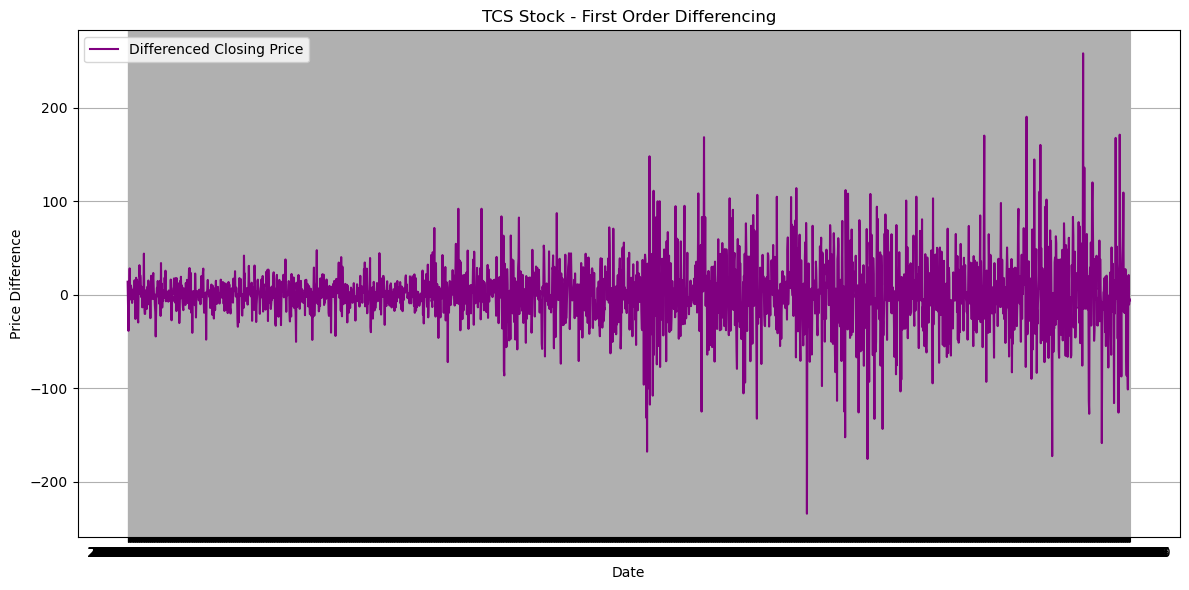

In [21]:
 #Step 5.1: First Order Differencing

df_diff = df['Close'].diff().dropna()

plt.figure(figsize=(12, 6))
plt.plot(df_diff, label='Differenced Closing Price', color='purple')
plt.title('TCS Stock - First Order Differencing')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
#🧪 Step 5.2: ADF Test on Differenced Data

from statsmodels.tsa.stattools import adfuller

adf_result_diff = adfuller(df_diff)

print('ADF Statistic (Differenced):', adf_result_diff[0])
print('p-value:', adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print(f'   {key}: {value}')

ADF Statistic (Differenced): -35.90558885861926
p-value: 0.0
Critical Values:
   1%: -3.4330077865854363
   5%: -2.8627141882428515
   10%: -2.5673950671859886


✅ Phase 3 – Step 6: ARIMA Modeling and Forecasting
🔍 What is ARIMA?
ARIMA = AutoRegressive Integrated Moving Average
It uses:

AR (p) – past values (lags)

I (d) – differencing (to make data stationary)

MA (q) – past forecast errors

📌 Step 6.1: Identify ARIMA Parameters (p, d, q)
We already found d = 1 (1st-order differencing).

Let’s now find the best p and q using auto_arima:

In [25]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.fillna(method='ffill', inplace=True)


Close     1
High      0
Low       0
Open      0
Volume    0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_12408\1042861940.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [26]:
from pmdarima import auto_arima

print(df.isnull().sum())

# Make sure to install it if not done yet: pip install pmdarima
stepwise_model = auto_arima(df['Close'], 
                            start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            d=1,           # already differenced once
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True,
                            stepwise=True)

print(stepwise_model.summary())


#✅ This will suggest the best (p, d, q) values.
#Let’s say it returns: ARIMA(2,1,2) (for example)

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24470.402, Time=1.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24471.201, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24472.358, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24472.299, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24472.454, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=24473.699, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24473.663, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=24471.654, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=24471.696, Time=0.19 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=24468.843, Time=2.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=24470.850, Time=3.47 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=24470.936, Time=3.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24475.636, Time=0.75 sec
 ARIMA(3,1,1)

✅ Phase 3 – Step 6.3 (Continued): Forecasting Future Stock Prices using ARIMA
Let’s forecast the next 30 days:

🔮 Forecast the Next 30 Days

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with selected order (e.g., ARIMA(2,1,2))
model = ARIMA(df['Close'], order=(2,1,2))
model_fit = model.fit()

print(model_fit.summary())


D:\Anaconda programs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda programs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda programs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2466
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -12231.440
Date:                Tue, 13 May 2025   AIC                          24472.880
Time:                        14:20:11   BIC                          24501.930
Sample:                             0   HQIC                         24483.434
                               - 2466                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1392      0.115      1.211      0.226      -0.086       0.364
ar.L2          0.7716      0.114      6.764      0.000       0.548       0.995
ma.L1         -0.1219      0.107     -1.136      0.2

In [29]:
forecast = model_fit.forecast(steps=30)


D:\Anaconda programs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda programs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
df.index = pd.to_datetime(df.index)
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)


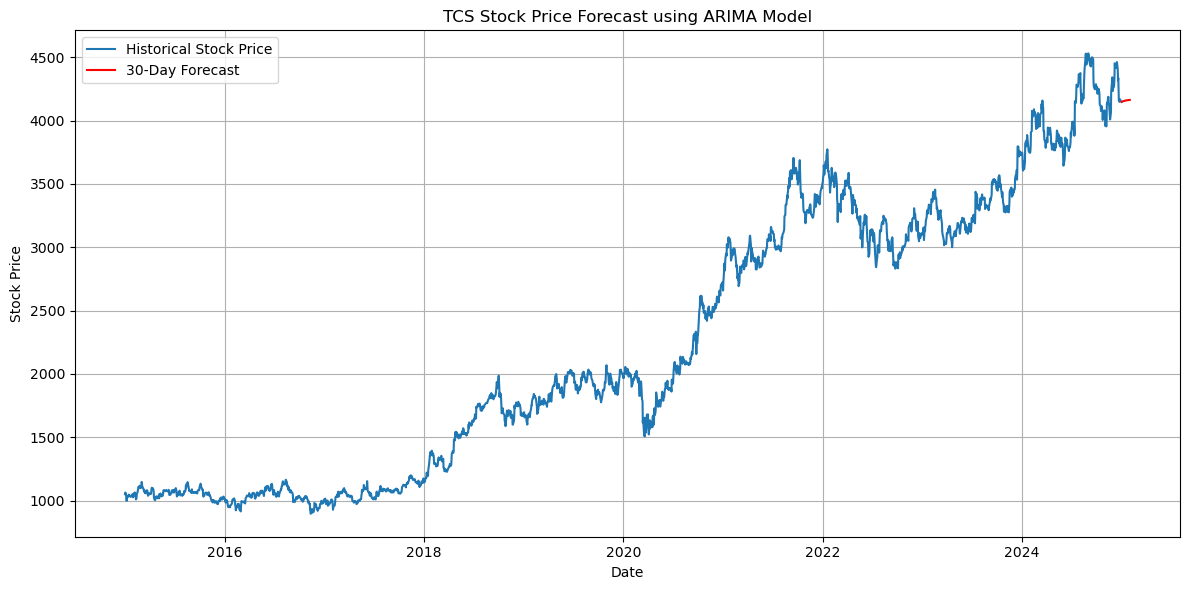

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the index is a datetime object
df.index = pd.to_datetime(df.index)

# Create forecast dates
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot the result
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Stock Price')
plt.plot(future_dates, forecast, label='30-Day Forecast', color='red')
plt.title('TCS Stock Price Forecast using ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Step 8: LSTM Model for Stock Price Forecasting

Epoch 1/20


D:\Anaconda programs\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0254
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.5102e-04
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 3.9237e-04
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 3.6479e-04
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 3.9756e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 3.5305e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.9219e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 3.1090e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 2.8539e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.8741e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.8084e-04
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.6119e-04
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.4858e-04
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2.7790e-04
Epoch 15/20
61/61 ━━━━━━━━━━━━

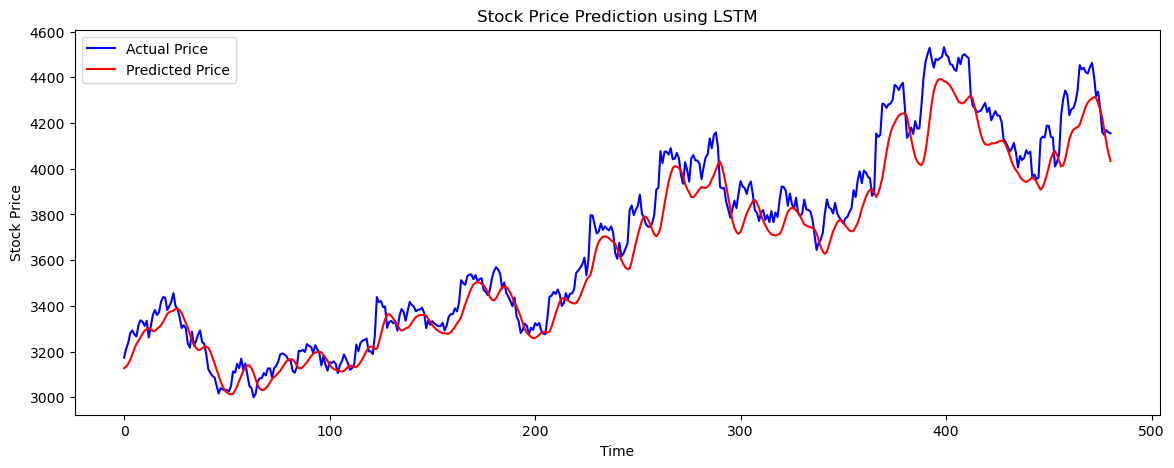

In [39]:
#We'll implement a basic LSTM model to forecast stock prices. LSTM is a deep learning model that works well with time-series data, especially for capturing long-term dependencies.

#1. Install Required Libraries:

#pip install tensorflow
#2. Preprocess the Data for LSTM:
#LSTM models expect the data to be scaled and formatted in a certain way.


import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df is your stock data and has a 'Close' column for stock prices

# Step 1: Preprocessing data (normalization and reshaping)
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'Close' column
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Step 2: Create a dataset for LSTM (using 60 previous days to predict the next day)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Reshaping X to be compatible with LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Step 3: Split data into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 4: Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 6: Predict using the LSTM model
predictions = model.predict(X_test)

# Invert the scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform([y_test])

# Ensure predictions and y_test have the same shape for plotting
predictions = predictions.flatten()  # Flatten the predictions array to match the shape of y_test

# Step 7: Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(y_test[0], color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
